<a href="https://colab.research.google.com/github/Mifekmk/SkillTreePython-DataAnalysis/blob/main/ch05_05_%EA%B8%B0%EC%B4%88%EB%AA%A8%EB%8D%B8%EA%B5%AC%ED%98%84_Adaline_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch05.05. 기초모델 구현 - Adaline
---
* 날짜: 2022-05-16
* 이름: 김민규

## 학습내용
    - 이진 분류 개념에 대해 이해한다.
    - Adaline 프로세스를 이해한다. 
    - Adaline 알고리즘을 구현한다.
    - 경사하강법에 대해 이해한다.

```
import numpy as np
import matplotlib.pyplot as plt
```

In [5]:
import numpy as np
import matplotlib.pyplot as plt


In [9]:

import sys
sys.path.append('/content/drive/MyDrive/딥러닝 프레임워크실무/05.머신러닝기반데이터분석')

In [10]:
from data_loader import iris_loader

## 클래스 작성
---

In [41]:
class AdalineGD():
  def __init__(self, lr=0.001, random_state=1):
    self.lr=lr
    self.seed = np.random.RandomState(random_state)

  def init_weights(self, X):
    size = X.shape[1]
    self.w = self.seed.normal(0, 0.01, size=size+1)  

  def model(self, X):
    return np.dot(X, self.w[:-1]) + self.w[-1]

  def predict(self, X):
    y_hat = self.model(X)
    logit = np.where(y_hat>=0.5, 1, 0)
    return logit

  def loss(self, y, y_hat):
    return 0.5*((y-y_hat)**2)
  
  def accuracy(self, y, y_logit):
    return np.count_nonzero(y-y_logit)/len(y)

  def evaluate(self, X, y):     # evaluate(self, X, y):
    y_hat = self.model(X)
    loss = ( self.loss(y,y_hat).sum() ) / len(y)
    
    y_logit = self.predict(X)
    acc = self.accuracy(y, y_logit) # 정확도
    return loss, acc

  def fit(self, X, y, epochs=10, show_params=False):

    self.init_weights(X) # 가중치 초기화
    self.history=dict(loss=[], acc=[]) # history 초기화

    for epoch in range(epochs):
      # 최적화
        for xi,yi in zip(X, y):
            y_hat = self.model(X)
            self.w[:-1]+= self.lr * np.dot(X.T , (y-y_hat))
            self.w[-1] += self.lr * np.sum(y-y_hat) 


      
      # 평가 및 결과 저장
        loss, acc = self.evaluate(X, y)
        self.history['loss'].append(loss)
        self.history['acc'].append(acc)
        print(f'[Epoch {epoch}] loss: {np.round(loss,2)}  acc: {np.round(acc,2)}')
        if show_params: print(self.w)

  # 데이터 흐름 시각화
  def draw_dflow(self, X, y, title='', figsize=(8,4)):
    y_hat = self.model(X)
    y_pred = self.predict(X)

    plt.figure(figsize=figsize)
    plt.title(title)
    plt.plot(y, label='y', marker='o')
    plt.plot(y_hat, label='$\hat{y}$', marker='.', linestyle='--')
    plt.plot(y_pred, label='$\logit$', marker='.', linestyle='--')
    plt.legend()
    plt.show()

  # 학습 곡선 시각화
  def draw_lcurve(self, title='', figsize=(8,4)):
    plt.figure(figsize=figsize)
    plt.title(title)
    plt.plot(self.history['acc'], label='acc', marker='o')
    plt.plot(self.history['loss'], label='loss', marker='o')
    plt.xlabel('epoch')
    plt.legend()
    plt.show()

## Iris 데이터로 분류 진행
---

### **데이터 로드**

In [40]:
X_train, X_test, y_train, y_test = iris_loader(1, 0)

(100, 4) (100,) [5.1 3.5 1.4 0.2] 0
(75, 4) (25, 4) (75,) (25,)


### **학습전 성능 평가**

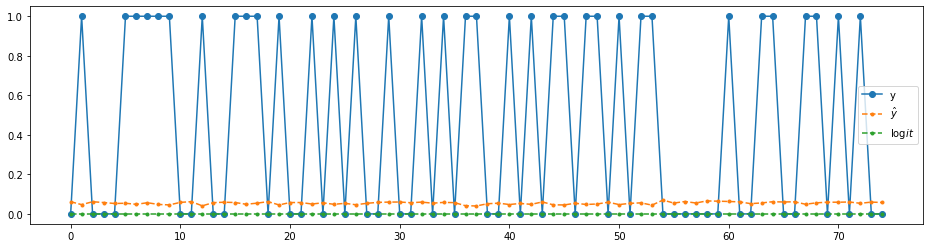

성능:  (0.21108347124931862, 0.4666666666666667)


In [32]:
model = AdalineGD(lr=0.0001)

model.init_weights(X_train)
model.draw_dflow(X_train, y_train, figsize=(16,4))
print('성능: ', model.evaluate(X_train, y_train))

### **학습**

In [33]:
history = model.fit(X_train, y_train, epochs=20)

[Epoch 0] loss: 0.02  acc: 0.0
[Epoch 1] loss: 0.01  acc: 0.0
[Epoch 2] loss: 0.01  acc: 0.0
[Epoch 3] loss: 0.01  acc: 0.0
[Epoch 4] loss: 0.01  acc: 0.0
[Epoch 5] loss: 0.01  acc: 0.0
[Epoch 6] loss: 0.01  acc: 0.0
[Epoch 7] loss: 0.01  acc: 0.0
[Epoch 8] loss: 0.01  acc: 0.0
[Epoch 9] loss: 0.01  acc: 0.0
[Epoch 10] loss: 0.01  acc: 0.0
[Epoch 11] loss: 0.01  acc: 0.0
[Epoch 12] loss: 0.01  acc: 0.0
[Epoch 13] loss: 0.01  acc: 0.0
[Epoch 14] loss: 0.01  acc: 0.0
[Epoch 15] loss: 0.01  acc: 0.0
[Epoch 16] loss: 0.01  acc: 0.0
[Epoch 17] loss: 0.01  acc: 0.0
[Epoch 18] loss: 0.01  acc: 0.0
[Epoch 19] loss: 0.01  acc: 0.0


### **학습 후 성능평가**

성능:  (0.005230321739245174, 0.0)


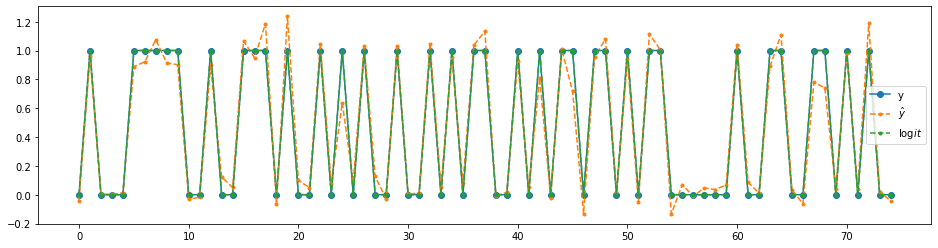

In [34]:
print('성능: ', model.evaluate(X_train, y_train))
model.draw_dflow(X_train, y_train, figsize=(16,4))

### **테스트셋 성능평가**

성능:  (0.0048348073310502775, 0.0)


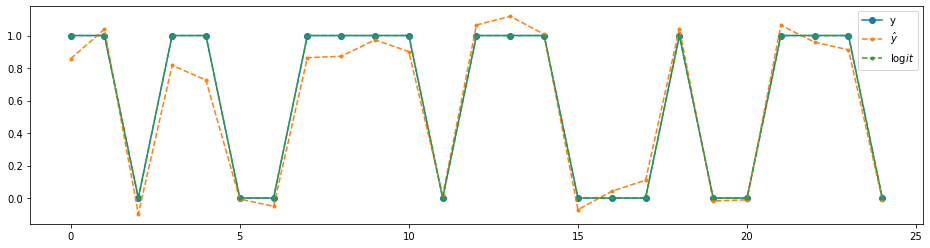

In [35]:
print('성능: ', model.evaluate(X_test, y_test))
model.draw_dflow(X_test, y_test, figsize=(16,4))

### **학습곡선**

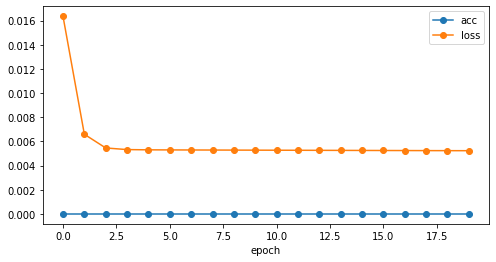

In [36]:
model.draw_lcurve()

### **하이퍼파라미터에 따른 성능평가**

In [37]:
for lr in [0.00001, 0.0001, 0.001, 0.01, 0.1]:
  model = AdalineGD(lr=lr)
  history = model.fit(X_train, y_train, epochs=10)
  print(f'===== lr {lr} ==== {model.evaluate(X_test, y_test)}')

[Epoch 0] loss: 0.08  acc: 0.04
[Epoch 1] loss: 0.07  acc: 0.0
[Epoch 2] loss: 0.05  acc: 0.0
[Epoch 3] loss: 0.05  acc: 0.0
[Epoch 4] loss: 0.04  acc: 0.0
[Epoch 5] loss: 0.03  acc: 0.0
[Epoch 6] loss: 0.03  acc: 0.0
[Epoch 7] loss: 0.02  acc: 0.0
[Epoch 8] loss: 0.02  acc: 0.0
[Epoch 9] loss: 0.02  acc: 0.0
===== lr 1e-05 ==== (0.016537457535864473, 0.0)
[Epoch 0] loss: 0.02  acc: 0.0
[Epoch 1] loss: 0.01  acc: 0.0
[Epoch 2] loss: 0.01  acc: 0.0
[Epoch 3] loss: 0.01  acc: 0.0
[Epoch 4] loss: 0.01  acc: 0.0
[Epoch 5] loss: 0.01  acc: 0.0
[Epoch 6] loss: 0.01  acc: 0.0
[Epoch 7] loss: 0.01  acc: 0.0
[Epoch 8] loss: 0.01  acc: 0.0
[Epoch 9] loss: 0.01  acc: 0.0
===== lr 0.0001 ==== (0.004475337617734873, 0.0)
[Epoch 0] loss: 3.4083848866058424e+63  acc: 0.53
[Epoch 1] loss: 1.0436404656454293e+128  acc: 0.47
[Epoch 2] loss: 3.19560571287844e+192  acc: 0.53
[Epoch 3] loss: 9.784879188127124e+256  acc: 0.47
[Epoch 4] loss: inf  acc: 0.53
[Epoch 5] loss: inf  acc: 0.47
[Epoch 6] loss: inf 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in square
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in add
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in double_scalars
